In [1]:
import pandas as pd 

In [2]:
summer = pd.read_csv("summer.csv")

In [3]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


## First we group by country and medal and then we count the number of medals.
## We have multiindex outer index is country and inner index is medal.

In [4]:
medal_by_country = summer.groupby(by=["Country", "Medal"]).Medal.count()

In [5]:
medal_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

We can use loc operator because we have multiindex.

In [8]:
medal_by_country.loc["USA"]

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

We can not use loc with "USA" key because it is not in the index.

In [9]:
summer.loc["USA"]

KeyError: 'USA'

# Method unstack() is used to convert the multiindex to a dataframe.
# We can use level parameter to specify which index to unstack.
# -1 is the last index(Medal) and -2 is first index(Country).
## We have NaN values because some countries do not have some medals.

In [11]:
medal_by_country.unstack(level=-1)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [12]:
medal_by_country.unstack(level=-2)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


In [13]:
medal_by_country = medal_by_country.unstack(level=-1, fill_value=0)

In [14]:
medal_by_country

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99
...,...,...,...
VIE,0,0,2
YUG,118,143,174
ZAM,1,0,1


Now we have 147 rows and 3 columns!

In [15]:
medal_by_country.shape

(147, 3)

Now we overwrite the column names.

In [17]:
medal_by_country = medal_by_country[["Gold", "Silver", "Bronze"]]

In [20]:
medal_by_country.sort_values(
    by=["Gold", "Silver", "Bronze"],
    ascending=[False, False, False],
    inplace=True
)

In [21]:
medal_by_country

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1


In [30]:
import matplotlib.pyplot as plt

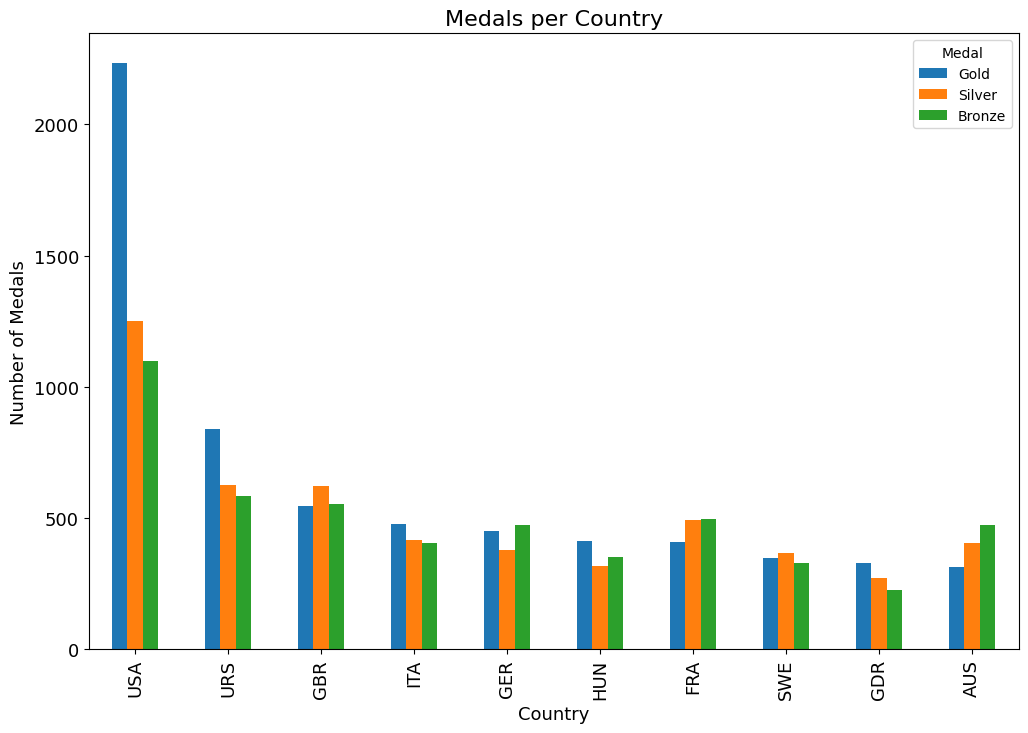

In [31]:
medal_by_country.head(10).plot(kind="bar", figsize=(12, 8), fontsize=13)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Number of Medals", fontsize=13)
plt.title("Medals per Country", fontsize=16)
plt.show()

## With stack() method is reverse of unstack() method.
## It is used to convert a dataframe to a multiindex and Pandas Series.

In [27]:
medal_by_country.stack()

Country  Medal 
USA      Gold      2235
         Silver    1252
         Bronze    1098
URS      Gold       838
         Silver     627
                   ... 
NIG      Silver       0
         Bronze       1
TOG      Gold         0
         Silver       0
         Bronze       1
Length: 441, dtype: int64